In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.io import read_image

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
    ])
    image_tensor = transform(image).unsqueeze(0) # add batch dim
    return image_tensor

In [4]:
image_path = 'dog.tiff'
image_tensor = load_image(image_path)
image_tensor.size()

torch.Size([1, 3, 224, 224])

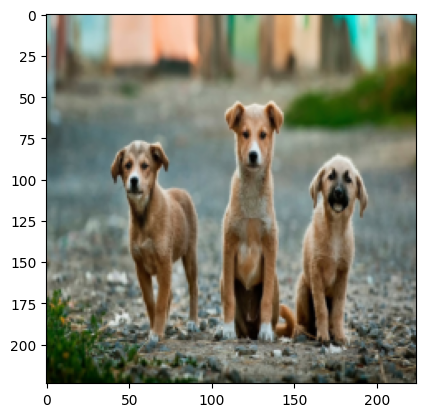

In [8]:
plt.imshow(image_tensor.squeeze(0).permute(1,2,0))

In [35]:
# Model
class Multilayer_ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,8,3,1,1,1)
        self.conv2 = nn.Conv2d(8,16,3,1,2,2)
        self.conv3 = nn.Conv2d(16,32,3,1,4,4)
        self.conv4 = nn.Conv2d(32,64,3,1,4,4)
        self.conv5 = nn.Conv2d(64,128,3,1,4,4)
        self.conv6 = nn.Conv2d(128,512,3,1,4,4)

    
    def forward(self, x):
        x = self.conv1(x)
        x1 = x
        x = self.conv2(x)
        x2 = x
        x = self.conv3(x)
        x3 = x
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x6 = x

        return x1, x2, x6

In [36]:
model = Multilayer_ConvNet()

with torch.no_grad():
    feature_maps = model(image_tensor) # 3 ota conv ko feature maps

In [37]:
feature_maps[2].shape

torch.Size([1, 512, 224, 224])

In [32]:
import math

In [39]:
# Function to plot feature maps
def plot_feature_maps(feature_maps, layer_idx):
    num_filters = feature_maps.shape[0]
    cols = 8
    rows = math.ceil(num_filters / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    axes = axes.flatten()
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(feature_maps[i, :, :].numpy(), cmap='viridis')
        ax.set_title(f'Feature map {i+1}')
        ax.axis('off')
    plt.suptitle(f'Feature Maps After Layer {layer_idx}')
    plt.tight_layout()
    plt.show()


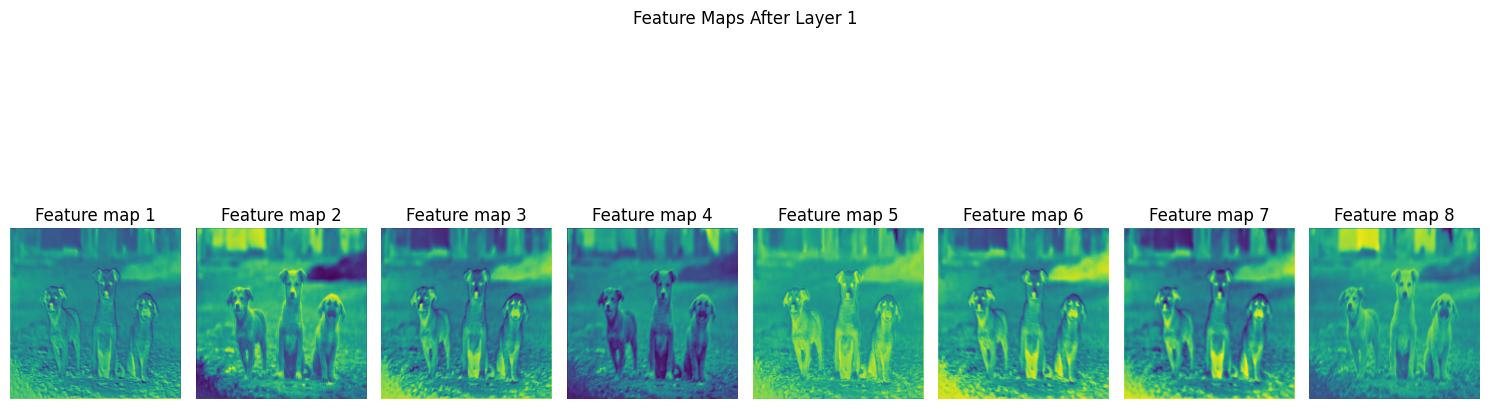

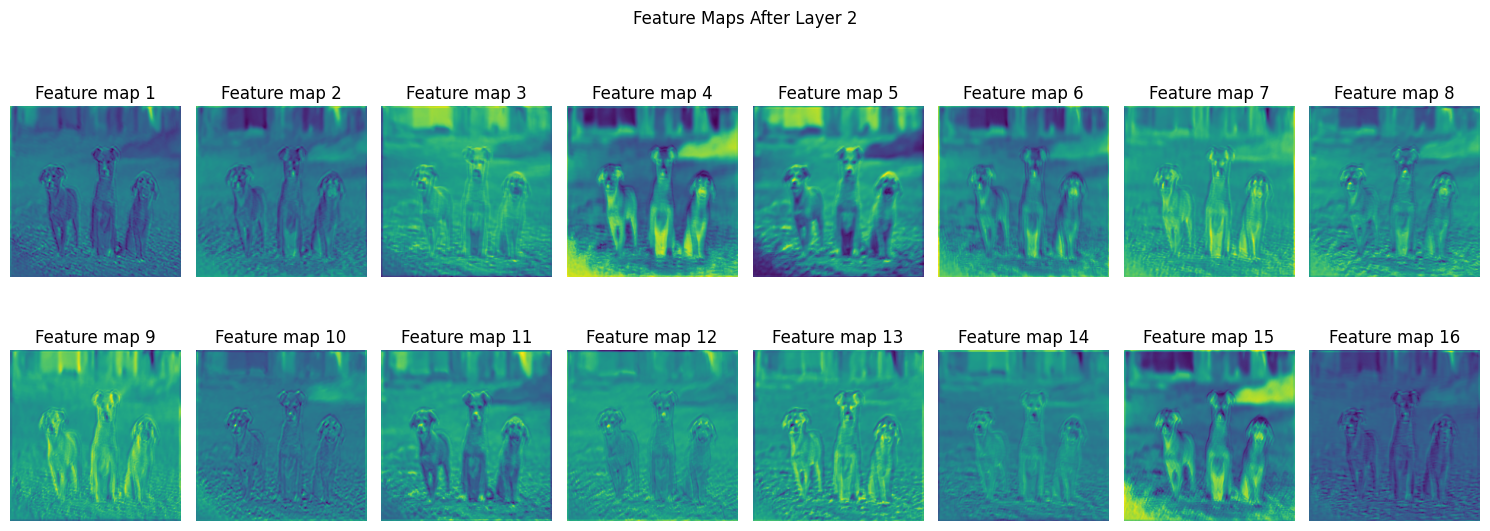

/tmp/ipykernel_2583539/304726103.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


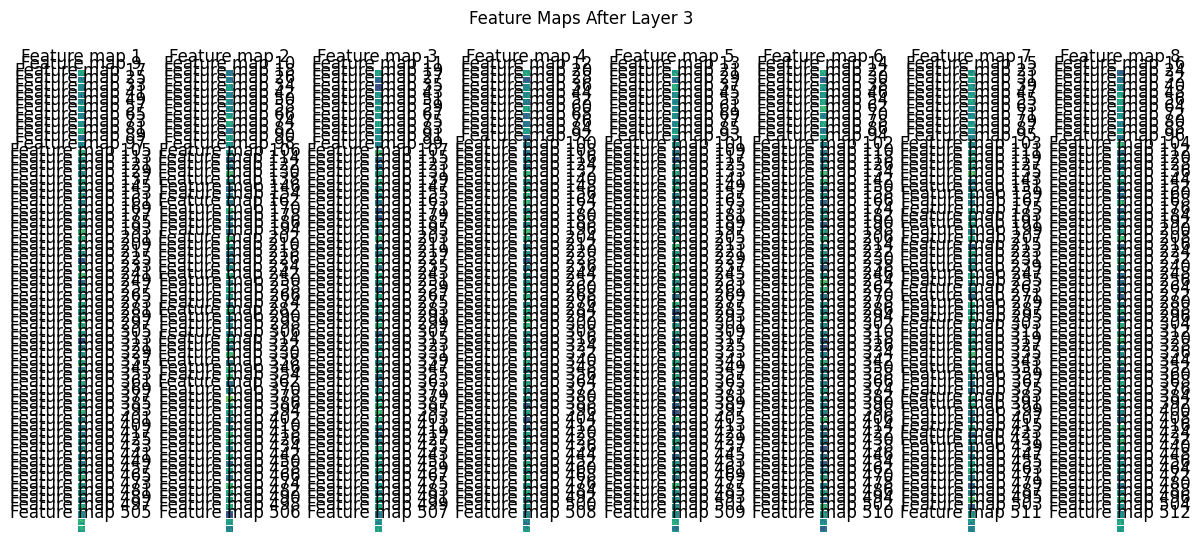

In [40]:
for idx ,fmap in enumerate(feature_maps):
    fmap = fmap.squeeze(0)
    plot_feature_maps(fmap, idx + 1)

Conclusion: As we increase the layer, feature maps will be more abstract and less directly recognizable.

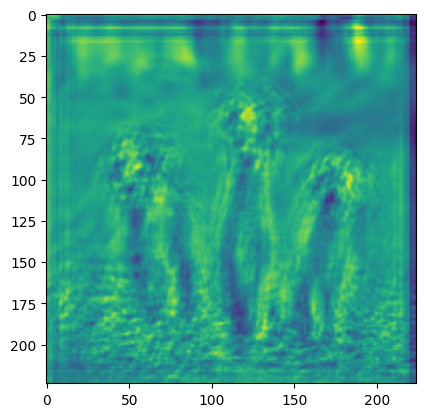

In [44]:
plt.imshow(feature_maps[2].squeeze(0)[511,:,:].numpy())
